
## Step 0: Load The Data





In [73]:
# Load pickled data
import pickle
import matplotlib.pyplot as plt
import cv2
import csv
import numpy as np
from numpy import newaxis
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from matplotlib import gridspec
# Visualizations will be shown in the notebook.
%matplotlib inline

In [74]:
#careful we have RGB not BGR
#convention uppercase X means list or array, lowercase means single object like image

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#test wo scalar RGB adjustments; how much difference?
def rgb_to_gray(X_train):
    almost_gray = np.add(np.add(X_train[:,:,:,0],X_train[:,:,:,1]),X_train[:,:,:,2])
    return almost_gray/3.0

#x = 0.299r + 0.587g + 0.114b.
def rgb_gray(X_train):
    gray = np.add(np.add(X_train[:,:,:,0]*.299,X_train[:,:,:,1]*.587),X_train[:,:,:,2]*.114)
    return gray
   
def normalize(X_train):
    return np.divide(np.subtract(X_train,128.),128.)

def np_grayscale(img):
    return np.array(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

#input: RGB image, integer for grayscale conversion
#output: greyscale image
#note to myself. Reformatting here wont plot
#X_train_fixdims = X_train_normalized[...,newaxis]
def preprocess(X,version):
    if version==0:
        X_train_gray = rgb_gray(X)
    elif version==1:
        X_train_gray = rbg_to_gray(X)
    elif version == 2:
        X_train_gray = np_grayscale(X)
    elif version==3:
        X_train_gray = greyscale(X)
    else:
        print('error preprocess invalid grayscale version')
    X_train_normalized = normalize(X_train_gray)
    print ('X_train_normalized shape:', X_train_normalized.shape)
    return X_train_normalized



#do the different grayscales/normalizations/mean subtraction make a difference? 
def preprocess_mean(X):
    X_train_gray = rgb_gray(X)
    X_train_normalized = normalize(X_train_gray)
    print ('subtracting mean:', np.mean(X_train_normalized))
    X_train_mean = X_train_normalized-np.mean(X_train_normalized)
    return X_train_mean


In [75]:
csv_dict = {}
with open('/Users/dc/CarND-Traffic-Sign-Classifier-Project/signnames.csv', 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        if (row[0]!='ClassId'):
            csv_dict[int(row[0])] = row[1]

print (csv_dict)

{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight o

X_train shape: (39209, 32, 32, 3)
y_train (labels for X_train) shape: (39209,)
X_train sizes shape: (39209, 2)
X_train coords shape: (39209, 4)
X_test shape: (12630, 32, 32, 3)
y_test (labels for X_test) shape: (12630,)
ytest sizes shape: (12630, 2)
ytest coords shape: (12630, 4)
bounding box coordinates of training image 0: [ 5  6 24 25]
X_train_normalized shape: (39209, 32, 32)
X_train_normalized shape: (12630, 32, 32)
X_train_pp shape: (39209, 32, 32)
X_test_pp shape: (12630, 32, 32)
X_train_pp_format shape: (39209, 32, 32, 1)
X_test_pp_format shape: (12630, 32, 32, 1)


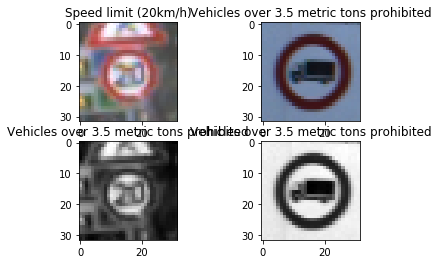

In [76]:
# TODO: Fill this in based on where you saved the training and testing dat
# the .p files are preprocessed from the download site above
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
# we need these later train['sizes'], train['coords']
# test['sizes'], test['coords']
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


print ('X_train shape:',(X_train.shape))
print ('y_train (labels for X_train) shape:', y_train.shape)
print ('X_train sizes shape:', train['sizes'].shape)
print ('X_train coords shape:', train['coords'].shape)


print ('X_test shape:',(X_test.shape))
print ('y_test (labels for X_test) shape:',(y_test.shape))
print ('ytest sizes shape:', (test['sizes'].shape))
print ('ytest coords shape:', (test['coords'].shape))

print ('bounding box coordinates of training image 0:', train['coords'][0])

# you an plot these
X_train_pp = preprocess(X_train,version=0)
X_test_pp = preprocess(X_test,version=0)

# matplotlib cant plot these
X_train_pp_format = X_train_pp[...,newaxis]
X_test_pp_format = X_test_pp[...,newaxis]


print('X_train_pp shape:', X_train_pp.shape)
print('X_test_pp shape:', X_test_pp.shape)

print('X_train_pp_format shape:', X_train_pp_format.shape)
print('X_test_pp_format shape:', X_test_pp_format.shape)


#TBD: find the original image and see if we can clean these up using the bounding box

gs1 = gridspec.GridSpec(2, 2)
#this spacing doesnt make a difference
gs1.update(wspace=2.0, hspace= 2.0)
plt.subplot(2,2,1)
plt.imshow(X_train[0])
plt.title(csv_dict[y_train[0]])
#test 
plt.subplot(2,2,2)
plt.imshow(X_test[0])
plt.title(csv_dict[y_test[0]])

plt.subplot(2,2,3)
plt.imshow(X_train_pp[0],cmap='gray')
plt.title(csv_dict[y_test[0]])

plt.subplot(2,2,4)
plt.imshow(X_test_pp[0],cmap='gray')
plt.title(csv_dict[y_test[0]])


(39209, 32, 32, 3)
tgray shape (39209, 32, 32)
min-max tgray: 66.587 253.527
tgray mean: 81.8998874369
min-max t_gray_normalized: -0.977921875 0.9921875
mean t_gray_normalized: -0.360157129399
min-max tgray_mean: -0.617764745601 1.3523446294
mean tgray_mean: 6.75983366641e-16
tgray[0] mean 0.35536490833
tgray_mean shape: [[[ -3.56944331e-02  -4.89834956e-02   1.31805669e-02 ...,  -7.89600581e-02
    -1.11014746e-01  -1.19631933e-01]
  [  8.03994190e-03  -1.30616206e-02   3.16961919e-02 ...,  -4.76241206e-02
    -4.47334956e-02  -2.44366206e-02]
  [ -2.08741206e-02   1.27118169e-02   5.55555669e-02 ...,  -6.81709956e-02
    -5.98038081e-02  -3.40303706e-02]
  ..., 
  [  3.59938379e-01   3.13868067e-01   2.55868067e-01 ...,   1.04813379e-01
     1.38313379e-01   1.51938379e-01]
  [  8.87508794e-02   1.09297754e-01   2.09383794e-02 ...,   1.66422754e-01
     2.09985254e-01   1.40813379e-01]
  [  2.14149419e-02   1.24032129e-01  -3.60850581e-02 ...,   1.47571192e-01
     1.32414942e-01   9

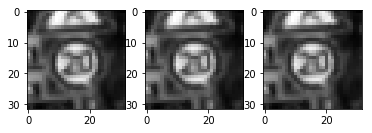

In [77]:
# we didnt subtract the mean of the dataset from these images

print (X_train.shape)
tgray = rgb_gray(X_train)

print ('tgray shape',tgray.shape)
print ("min-max tgray:",np.amin(tgray[0]),np.amax(tgray[0]))
print ('tgray mean:',np.mean(tgray))

t_gray_normalized = normalize(tgray)
print ("min-max t_gray_normalized:",np.amin(t_gray_normalized),np.amax(t_gray_normalized))
print ('mean t_gray_normalized:', np.mean(t_gray_normalized))


tgray_mean = t_gray_normalized - np.mean(t_gray_normalized)
print ("min-max tgray_mean:",np.amin(tgray_mean),np.amax(tgray_mean))
print ('mean tgray_mean:', np.mean(tgray_mean))
print ('tgray[0] mean',np.mean(tgray_mean[0]))
#what we really want ia a histogram of mean values/image and plot to see the distribution
#the overall mean is close to 0. The numbers above say tgray_mean is close to 0 but tgray is -.36
print ('tgray_mean shape:', tgray_mean)

#check
fig = plt.figure()
a=fig.add_subplot(1,3,1)
plt.imshow(tgray[0],cmap='gray')
b=fig.add_subplot(1,3,2)
plt.imshow(t_gray_normalized[0],cmap='gray')
c=fig.add_subplot(1,3,3)
plt.imshow(tgray_mean[0],cmap='gray')



In [ ]:


#normalize and gray scale
#EPOCH 10 ...
#Validation Accuracy = 0.977
#Test Accuracy = 0.923 test=0



In [ ]:
#np.set_printoptions(threshold=5000)
#print (X_train[0,:,:,0])
#plt.imshow(X_train[0,:,:,0])


In [ ]:
#plt.imshow(X_train[0][:,:,1])
#print (X_train[0,:,:,1])
#print (X_train[0,:,:,1].shape)

In [ ]:
#print(X_train[0,:,:,2])
#plt.imshow(X_train[0,:,:,2]) #looks like Blue, matches

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [78]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(csv_dict)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

print (type(X_train))

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
<class 'numpy.ndarray'>


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

There is a German traffic sign dataset here: 
http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset#Downloads

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

(array([  60.,  720.,  750.,  450.,  660.,  630.,  150.,  450.,  450.,
         480.,  660.,  420.,  690.,  720.,  270.,  210.,  150.,  360.,
         390.,   60.,   90.,   90.,  120.,  150.,   90.,  480.,  180.,
          60.,  150.,   90.,  150.,  270.,   60.,  210.,  120.,  390.,
         120.,   60.,  690.,   90.,   90.,   60.,   90.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.13953488,  37.11627907,  38.09302326,
         39.06976

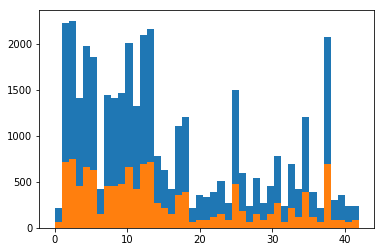

In [79]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.


#plot histogram of classes/images for training. 
plt.hist(train['labels'], bins = n_classes)
plt.hist(test['labels'], bins=n_classes)

#this is awful. Poor distribution. 

In [ ]:
num_train=0
num_test=0

for x in train['labels']:
    if x==20:
        num_train+=1
print(num_train)

for x in test['labels']:
    if x==20:
        num_test +=1
print (num_test)

60/210
720/2220
750/2250
#varies from 25-33%

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** grayscale, normalization from lecture and paper. 

x: 0
img.shape: (32, 32, 3) rotate shape: (39, 39, 3)
blur shape: (39, 39, 3)
dst_plus shape: (32, 32, 3)
dst_minus shape: (32, 32, 3)
crop_plus shape: (26, 26, 3)
crop_minus shape: (26, 26, 3)
crop_plus_resize shape: (32, 32, 3)
crop_plus_resize shape: (32, 32, 3)


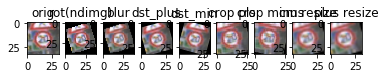

In [10]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

#additional data for classes which are low in training examples, rotate +-15 degrees, translate, histogram for darkness
#POINT: ndimage is awful. Use opencv
#POINT: we want a rotation wo the black edges after rotation which enlarges and shifts image
#images below show proof of artifacts and correction using warpTransform to unshift and shrink
#
from scipy import ndimage
x=0
print("x:", x)
img = train['features'][x]
    
#label = train['labels'][x]
#print (csv_dict[label])
#reshape adds more black artifacts
rot = ndimage.rotate(img,15,reshape=True)

print ("img.shape:",img.shape,"rotate shape:",rot.shape)
blur=ndimage.gaussian_filter(rot,.5)
print ('blur shape:', blur.shape)
#CAREFUL THE CROP MOVES THE IMAGE and makes it bigger!!!
#CAREFUL CROP uses gaussian blur output as starting point
#crop = blur[7:33,7:33]
#print ('crop.shape',crop.shape)
cols,rows=32,32
rotAngle=15
scaleFactor=.9
M_plus = cv2.getRotationMatrix2D((cols/2,rows/2),rotAngle,scaleFactor)
M_minus = cv2.getRotationMatrix2D((cols/2,rows/2),-rotAngle,scaleFactor)
#32,32 is final destination size

dst_plus = cv2.warpAffine(img,M_plus,(cols,rows))
dst_minus = cv2.warpAffine(img,M_minus,(cols,rows))

crop_plus = dst_plus[4:30,4:30]
crop_minus = dst_minus[4:30,4:30]

#we dont need this b/c the warpaffine gives a final size
#dst_resize = cv2.resize(dst,(32,32))
print('dst_plus shape:', dst_plus.shape)
print('dst_minus shape:', dst_minus.shape)
print('crop_plus shape:', crop_plus.shape)
print('crop_minus shape:', crop_minus.shape)

crop_plus_resize = cv2.resize(crop_plus,(32,32))
crop_minus_resize = cv2.resize(crop_plus,(32,32))

print ('crop_plus_resize shape:', crop_plus_resize.shape)
print ('crop_plus_resize shape:', crop_minus_resize.shape)

#recenter
fig = plt.figure()

#there are a couple ways to draw figures in grids. I can never seem to remember them all and websearches are confusing
#the easiest is 3 lines
# fig = plt.figure
# fig.add_subplot(1,7,1) which is 1 row with 7 columns adding first subplot for the last argument
# plt.imshow(img)
# easy to remember but painful to add more rows or columns cause you have to change all the constants
# the second way is to use a plt.tight_layout
#
#
# the third way is to use a gridspec
#

#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
def plotFirst():
    fig.add_subplot(1,9,1)
    plt.imshow(img)
    plt.title('orig')
    fig.add_subplot(1,9,2)
    plt.imshow(rot)
    plt.title('rot(ndimg)')
    fig.add_subplot(1,9,3)
    plt.imshow(blur)
    plt.title('blur')
    fig.add_subplot(1,9,4)
    plt.imshow(dst_plus)
    plt.title('dst_plus')
    fig.add_subplot(1,9,5)
    plt.imshow(dst_minus)
    plt.title('dst_min')
    fig.add_subplot(1,9,6)
    plt.imshow(crop_plus)
    plt.title('crop pls')
    fig.add_subplot(1,9,7)
    plt.imshow(crop_minus)
    plt.title('crop minus')
    fig.add_subplot(1,9,8)
    plt.imshow(crop_minus_resize)
    plt.title('cm resize')
    fig.add_subplot(1,9,9)
    plt.imshow(crop_plus_resize)
    plt.title('plus resize')

plotFirst()    
#for x in range(len(train['features'])):
#break; 

#note: the crop_plus and crop_minus still look bigger than the original 



In [129]:
#split train into train/validate
X_train= X_train_pp_format
X_test = X_test_pp_format
print ('X_train grayscale shape', X_train.shape, ' Xtrain labels.shape', train['labels'].shape)

#shuffle before creating validation set. 
X_train, y_train = shuffle(X_train, train['labels'])
print ("after shuffle X_train shape", X_train.shape, "y_train shape:", y_train.shape)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify = y_train, test_size=.25, random_state=123)

print ("X_train", X_train.shape, " X_valid:", X_valid.shape, " y_train:", y_train.shape, " y_valid:", y_valid.shape)

#we want as close to 30k from above calculation
#check 

print (csv_dict[y_train[0]])
print (X_train[0].shape)
print (X_train.dtype)
#do not continue till you see (32,32,x1) else you are screwed...means made dumb formatting mistake before 
#here!!!!

X_train grayscale shape (39209, 32, 32, 1)  Xtrain labels.shape (39209,)
after shuffle X_train shape (39209, 32, 32, 1) y_train shape: (39209,)
X_train (29406, 32, 32, 1)  X_valid: (9803, 32, 32, 1)  y_train: (29406,)  y_valid: (9803,)
Speed limit (60km/h)
(32, 32, 1)
float64


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [141]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


#EPOCHS= 30  #Test Accuracy = 0.972
EPOCHS = 10 #Test Accuracy = 0.922
BATCH_SIZE = 100
patch_size = 5
num_color = 1 
depth = 6

save_path = '/Users/dc/CarND-Traffic-Sign-Classifier-Project/10EPOCHS.ckpt'
#save_path = '/Users/dc/CarND-Traffic-Sign-Classifier-Project/30EPOCHS.ckpt'

from tensorflow.contrib.layers import flatten


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(patch_size, patch_size, num_color, depth), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(depth))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    print ("befre relu conv1 shape:", conv1.get_shape())
    
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    print ("after relu conv1 shape:", conv1.get_shape())
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print ("after maxpool conv1 shape:", conv1.get_shape())
    
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    print ("before relu conv2 shape:", conv1.get_shape())
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    print ("after relu conv2 shape:", conv1.get_shape())
    
    
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print ("after max_pool conv2 shape:", conv1.get_shape())
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    flat = tf.contrib.layers.flatten(conv2)
    print ("flat shape:",flat.get_shape())
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1   = tf.matmul(flat, fc1_W) + fc1_b
    
    print ("before relu fc1 shape:", fc1.get_shape())
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    print ("after relu fc1 shape:", fc1.get_shape())
    h_fc1_drop = tf.nn.dropout(fc1, keep_prob)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(200, 100), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(100))
    fc2    = tf.matmul(h_fc1_drop, fc2_W) + fc2_b
    
    print ("before relu fc2 shape:", fc2.get_shape())
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    print ("after relu fc2 shape:", fc2.get_shape())
    
    h_fc2_drop = tf.nn.dropout(fc2, keep_prob)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(h_fc2_drop, fc3_W) + fc3_b
    
    print ('logits shape:',logits.get_shape())
    return logits





In [138]:
import tensorflow as tf

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
#dropout from tf mnist webpage https://www.tensorflow.org/get_started/mnist/pros
keep_prob = tf.placeholder(tf.float32)

In [139]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

befre relu conv1 shape: (?, 28, 28, 6)
after relu conv1 shape: (?, 28, 28, 6)
after maxpool conv1 shape: (?, 14, 14, 6)
before relu conv2 shape: (?, 14, 14, 6)
after relu conv2 shape: (?, 14, 14, 6)
after max_pool conv2 shape: (?, 14, 14, 6)
flat shape: (?, 400)
before relu fc1 shape: (?, 200)
after relu fc1 shape: (?, 200)
before relu fc2 shape: (?, 100)
after relu fc2 shape: (?, 100)
logits shape: (?, 43)


In [140]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [143]:
from sklearn.utils import shuffle

print('X_valid shape:', X_valid.shape)
print('y_valid shape:', y_valid.shape)
print ('X_train shape', X_train.shape)
print ('y_train shape', y_train.shape)
print ('logits shape:', logits.get_shape())

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print ('num_examples', num_examples)
    print("Training...")
    print('X_valid shape:', X_valid.shape)
    print('y_valid shape:', y_valid.shape)
    print ('X_train shape', X_train.shape)
    print ('y_train shape', y_train.shape)
    print ('logits shape:', logits.get_shape())
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            #print ('offset:', offset, 'end:',end)
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            #print ('batch_x shape:',batch_x.shape,' batch_y.shape', batch_y.shape)
            loss = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 0.5})
            #print ('loss:',loss)
        #
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, save_path)
    print("Model saved")

X_valid shape: (9803, 32, 32, 1)
y_valid shape: (9803,)
X_train shape (29406, 32, 32, 1)
y_train shape (29406,)
logits shape: (?, 43)
num_examples 29406
Training...
X_valid shape: (9803, 32, 32, 1)
y_valid shape: (9803,)
X_train shape (29406, 32, 32, 1)
y_train shape (29406,)
logits shape: (?, 43)
EPOCH 1 ...
Validation Accuracy = 0.619

EPOCH 2 ...
Validation Accuracy = 0.837

EPOCH 3 ...
Validation Accuracy = 0.897

EPOCH 4 ...
Validation Accuracy = 0.929

EPOCH 5 ...
Validation Accuracy = 0.948

EPOCH 6 ...
Validation Accuracy = 0.954

EPOCH 7 ...
Validation Accuracy = 0.963

EPOCH 8 ...
Validation Accuracy = 0.969

EPOCH 9 ...
Validation Accuracy = 0.972

EPOCH 10 ...
Validation Accuracy = 0.972

EPOCH 11 ...
Validation Accuracy = 0.975

EPOCH 12 ...
Validation Accuracy = 0.976

EPOCH 13 ...
Validation Accuracy = 0.978

EPOCH 14 ...
Validation Accuracy = 0.980

EPOCH 15 ...
Validation Accuracy = 0.979

EPOCH 16 ...
Validation Accuracy = 0.981

EPOCH 17 ...
Validation Accuracy = 0.9

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [148]:
#difference between latest checkpoint and save? 
with tf.Session() as sess:
    saver.restore(sess, save_path)

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

TypeError: Cannot interpret feed_dict key as Tensor: The name '60_kmh.jpg' looks like an (invalid) Operation name, not a Tensor. Tensor names must be of the form "<op_name>:<output_index>".

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


In [ ]:
**Answer:** Adam Optimizer. 
    number of training examples = batch_size*#epochs
    hyperparamters: 
    
    This has nothing to do with our data: 
    30 samples in validation set is Satistically Significant. Lecture 26 Intro to TF
    if 3000 examples in validation set, 1%*3000/100=30 examples. So 1% accuarte. 
    7842*x%/100=30 examples; x=3000/7842=.38. Accurate to ~99%-.4=98.6. Is this a correct statement?
    
    
    
    
    

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

x: 60_kmh.jpg
image.shape  (32, 32, 3)
small.shape:  (32, 32, 3)


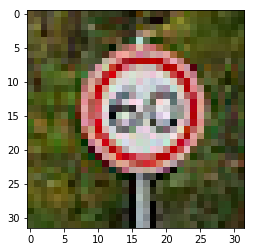

X_train_normalized shape: (1, 32, 32)
X_OUTSIDE_process shape (1, 32, 32)
X_OUTSIDE shape (1, 32, 32, 1)
float64


In [145]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import os

imgs = os.listdir("/Users/dc/Downloads/add_pics/one")
imgs_list = []


for x in imgs:
    print('x:',x)
    image = mpimg.imread("/Users/dc/Downloads/add_pics/one/"+x)
    print ('image.shape ',image.shape)
    small=cv2.resize(image,(32,32))
    imgs_list.append(small)
    print ('small.shape: ',small.shape)
    plt.imshow(small)
    plt.show()
    
X_OUTSIDE_IMAGE = np.array(imgs_list)
X_OUTSIDE_pp = preprocess(X_OUTSIDE_IMAGE,version=0)
X_OUTSIDE_pp_format=X_OUTSIDE_pp[...,newaxis]
#X_OUTSIDE_pp_format=X_OUTSIDE_pp_format.astype(np.float32)
print ('X_OUTSIDE_process shape', X_OUTSIDE_pp.shape)
print ('X_OUTSIDE shape',X_OUTSIDE_pp_format.shape)
print (X_OUTSIDE_pp_format.dtype)

(32, 32, 1)


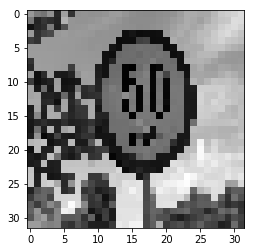

In [120]:
plt.imshow(X_OUTSIDE_pp[0],cmap='gray')
print(X_OUTSIDE_pp_format[0].shape)

(32, 32, 1)


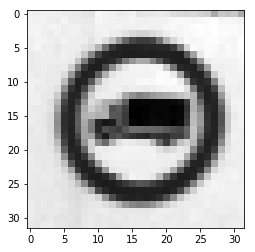

In [119]:
# debug use test or validation images
plt.imshow(X_test_pp[0],cmap='gray')
print(X_test_pp_format[0].shape)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [151]:
#sess = tf.Session()
#new_saver = tf.train.import_meta_graph('10EPOCHS.ckpt.meta')
#new_saver.restore(sess, tf.train.latest_checkpoint('/Users/dc/CarND-Traffic-Sign-Classifier-Project/10EPOCHS.ckpt'))
with tf.Session() as sess:
    saver.restore(sess, save_path )

In [152]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

testMe=[]
testMe.append(X_test_pp_format[0])
T_test=np.array(testMe)
print('T_test shape:',T_test.shape)

with tf.Session() as sess:
    saver.restore(sess, save_path )
    softmax = tf.nn.softmax(logits)
    top_k_val, top_k_idx = tf.nn.top_k(softmax, k=5)
    
    top_k_vals, top_k_idxs = sess.run([top_k_val, top_k_idx], feed_dict={x: T_test, keep_prob : 1.0})


T_test shape: (1, 32, 32, 1)


TypeError: Cannot interpret feed_dict key as Tensor: The name '60_kmh.jpg' looks like an (invalid) Operation name, not a Tensor. Tensor names must be of the form "<op_name>:<output_index>".

In [147]:

testMe=[]
testMe.append(X_OUTSIDE_pp_format[0])
T_test=np.array(testMe)
print('T_test shape:',T_test.shape)



with tf.Session() as sess:
    saver.restore(sess, save_path )
    softmax = tf.nn.softmax(logits)
    
    new  = sess.run(logits, feed_dict={x: X_OUTSIDE_pp_format, keep_prob : 1.0})
   


T_test shape: (1, 32, 32, 1)


TypeError: Cannot interpret feed_dict key as Tensor: The name '60_kmh.jpg' looks like an (invalid) Operation name, not a Tensor. Tensor names must be of the form "<op_name>:<output_index>".

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [110]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.


#print (top_k_vals)
for x in range( len(top_k_idxs[0])):
    print ('prob:',top_k_vals[0][x],' class:',csv_dict[top_k_idxs[0][x]])


prob: 1.0  class: Vehicles over 3.5 metric tons prohibited
prob: 1.7263e-09  class: Speed limit (100km/h)
prob: 6.63732e-11  class: No passing for vehicles over 3.5 metric tons
prob: 7.88739e-12  class: No passing
prob: 4.08866e-12  class: Speed limit (80km/h)


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.